In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# mnist 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

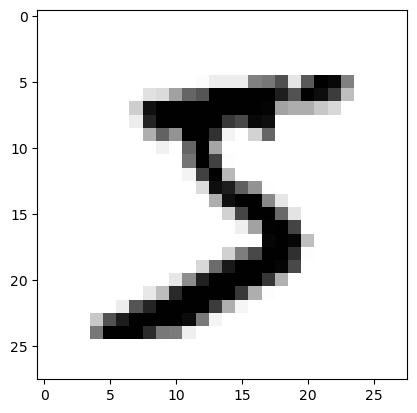

In [3]:
plt.imshow(x_train[0], cmap = "gray_r")
plt.show()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
 y_train.shape, y_test.shape

((60000,), (10000,))

In [6]:
# 지금은 Conv2D를 적용하기 위해서 채널 차원을 추가
scaled_train = x_train.reshape(-1, 28, 28, 1) / 255

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
scaled_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [9]:
model = keras.Sequential()

In [10]:
# 합성곱 층 추가
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same",
                             input_shape = (28, 28, 1)))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
# 풀링층 추가
model.add(keras.layers.MaxPool2D(2))

In [12]:
# 두 번째 합성곱 - 풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D(2))

In [13]:
# 3차원 특성맵을 일렬로 펼침
model.add(keras.layers.Flatten())

In [14]:
# 밀집 은닉층을 하나 더 추가한 후 드롭아웃을 넣어 과대적합을 방지하고 성능을 개선
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dropout(0.4))

In [15]:
# 출력층 - 10개의 클래스를 분류하는 다중 분류
model.add(keras.layers.Dense(10, activation = "softmax"))

In [16]:
# 모델 구조 확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

# 모델 훈련

In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-cnn.model.keras",
                                               save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [18]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [19]:
# 검증 데이터 분할
x_sub, x_val, y_sub, y_val = train_test_split(scaled_train, y_train, test_size = 0.25,
                                             stratify = y_train, random_state = 11)

In [20]:
history = model.fit(x_sub, y_sub, epochs = 20, validation_data = (x_val, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8447 - loss: 0.4795 - val_accuracy: 0.9794 - val_loss: 0.0635
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9715 - loss: 0.0948 - val_accuracy: 0.9846 - val_loss: 0.0506
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9794 - loss: 0.0675 - val_accuracy: 0.9886 - val_loss: 0.0407
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9845 - loss: 0.0519 - val_accuracy: 0.9891 - val_loss: 0.0368
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9862 - loss: 0.0451 - val_accuracy: 0.9900 - val_loss: 0.0383
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9892 - loss: 0.0318 - val_accuracy: 0.9901 - val_loss: 0.0388
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9904 - loss: 0.0307 - val_accuracy: 0.9891 - val_loss: 0.0421
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9900 - loss

# 훈련 로그 확인

In [21]:
history.history

{'accuracy': [0.9254000186920166,
  0.9724888801574707,
  0.9805333614349365,
  0.984511137008667,
  0.9862222075462341,
  0.9885777831077576,
  0.9898444414138794,
  0.9903777837753296,
  0.9923999905586243,
  0.9929111003875732,
  0.9927777647972107,
  0.9942222237586975],
 'loss': [0.2425248920917511,
  0.08953669667243958,
  0.06495754420757294,
  0.05235494300723076,
  0.04353970289230347,
  0.03465690463781357,
  0.03094211034476757,
  0.02856624312698841,
  0.022702202200889587,
  0.021570608019828796,
  0.021055806428194046,
  0.018932176753878593],
 'val_accuracy': [0.9793999791145325,
  0.9846000075340271,
  0.9886000156402588,
  0.989133358001709,
  0.9900000095367432,
  0.9901333451271057,
  0.989133358001709,
  0.9896000027656555,
  0.9905999898910522,
  0.9905999898910522,
  0.9900000095367432,
  0.9911333322525024],
 'val_loss': [0.06346972286701202,
  0.050581928342580795,
  0.0406566858291626,
  0.03683285415172577,
  0.03829317167401314,
  0.038838066160678864,
  0.04

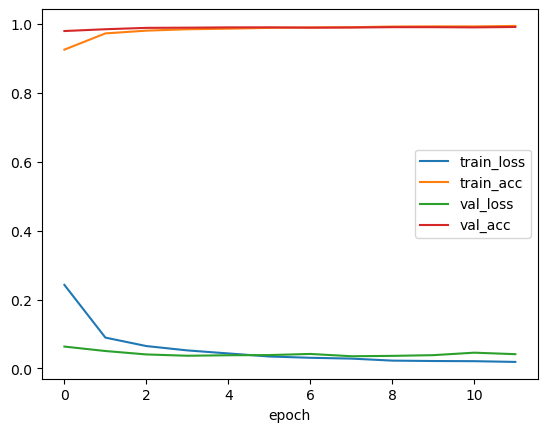

In [22]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 모델 성능 검증

In [23]:
scaled_test = x_test.reshape(-1, 28, 28, 1) / 255

In [24]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0312


[0.028857335448265076, 0.9921000003814697]

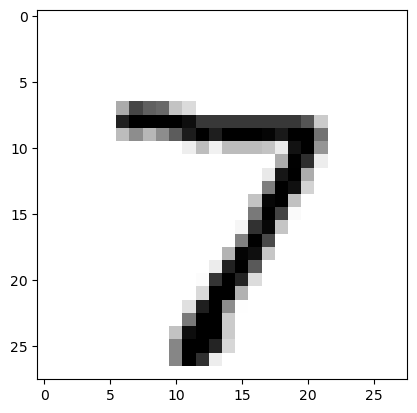

In [39]:
# 데이터 시각화
plt.imshow(scaled_test[0].reshape(28, 28), cmap = "gray_r")
plt.show()

In [26]:
preds = model.predict(scaled_test[[0]])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[1.0508865e-13 5.7815879e-12 2.7769205e-09 9.9762176e-10 1.3039152e-11
  3.9655826e-12 5.1423734e-18 1.0000000e+00 3.1475142e-10 1.5479321e-08]]


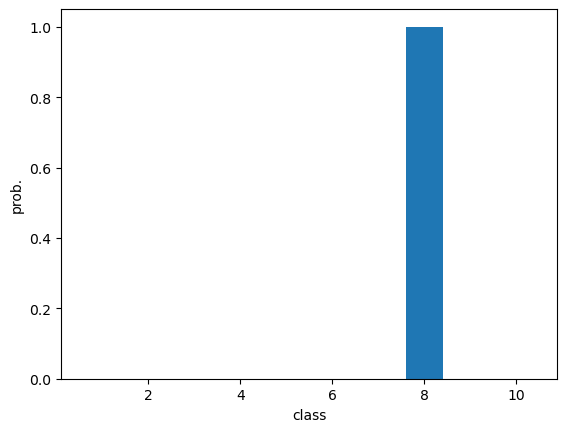

In [27]:
plt.figure()

plt.bar(range(1, 11), preds[0])

plt.xlabel("class")
plt.ylabel("prob.")
plt.show()

In [28]:
np.argmax(preds)

7

In [29]:
y_test[0]

7

# 필터의 가중치

In [30]:
# 저장해둔 CNN 모델 불러오기
model = keras.models.load_model("./model/best-cnn.model.keras")

In [31]:
# 모델 층 확인
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [32]:
# 첫 번째 합성곱 층의 가중치 확인
conv = model.layers[0] # <Conv2D name=conv2d, built=True>

In [33]:
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [34]:
conv_weights = conv.weights[0].numpy()
conv_weights

array([[[[ 1.33579716e-01,  2.69666803e-03,  3.48176241e-01,
          -1.49224460e-01,  2.25178108e-01, -2.20776573e-01,
           1.39257044e-01, -1.33691072e-01, -2.49226578e-03,
           1.58084139e-01,  1.21112771e-01, -1.75590858e-01,
          -1.68795362e-02,  2.02057645e-01, -1.86802298e-02,
          -2.87154645e-01, -2.17646495e-01, -8.36531222e-02,
           5.35874534e-03, -2.81830519e-01, -2.66971380e-01,
          -1.85074627e-01, -2.49404702e-02, -7.54767982e-03,
          -3.75614822e-01,  9.86293703e-02,  1.22813039e-01,
          -1.62437171e-01,  1.02868617e-01, -5.06554693e-02,
          -2.34866232e-01,  1.96716741e-01]],

        [[-3.21812302e-01,  7.92277157e-02, -1.25322297e-01,
          -4.96175349e-01,  2.38952249e-01,  1.21828713e-01,
           3.25791448e-01, -1.94763944e-01,  7.71657526e-02,
           1.12757802e-01, -1.79713920e-01, -5.15154839e-01,
          -5.35067059e-02,  1.30540043e-01, -3.33786070e-01,
          -2.02992007e-01, -4.60368335

In [35]:
print(conv_weights.mean(), conv_weights.std())

-0.0032805859 0.20465024


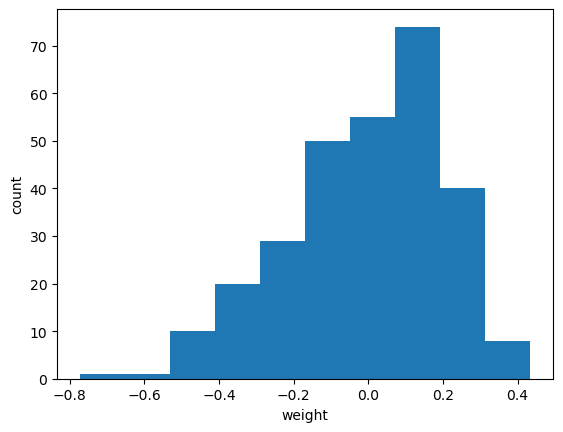

In [36]:
# 가중치 히스토그램
plt.figure()

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

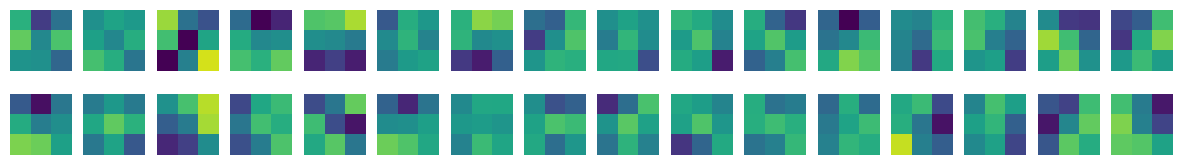

In [37]:
# 32개의 커널을 모두 시각화
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis("off")
        
plt.show()